In [25]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import time
import numpy as np
import geopandas as gpd
import pandas as pd
from rasterstats import zonal_stats
import pandas as pd
import numpy as np
import folium
import streamlit as st
import geopandas as gpd
from pathlib import Path
from shapely.geometry import Point
from colour import Color
from shapely.geometry import box
from shapely.strtree import STRtree
import contextily as ctx
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline




In [26]:
#load in population grid info. 
PROJECT_ROOT = Path().absolute().parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
PROCESSED_DATA_DIR = DATA_DIR / 'processed'
TEMP_DATA_DIR = DATA_DIR / 'temp'


population_info_raw=pd.read_csv(PROCESSED_DATA_DIR/'station_population_data.csv')

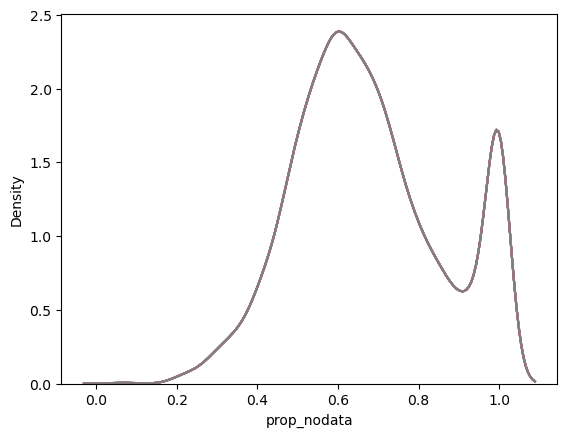

In [ ]:
population_info_raw.describe()

sns.kdeplot(population_info_raw['prop_nodata'])
plt.show()

In [43]:
# open the gridded buffers (which has the polygons for each grid_id)
gridded_buffers_gdf=gpd.read_file(PROCESSED_DATA_DIR/'gridded_buffers_gdf.gpkg')
#select those grid cells where the proportion of nodata is lower than 0.8. Thus in at least one fifth of the cells should be inhabited. 
sampling_frame=population_info_raw.loc[population_info_raw['prop_nodata']<=0.8]

#how many cells left after exclky
sampling_frame.groupby(['station_name','buffer_km']).size()

station_name  buffer_km
Aisa FM       20.0          880
              25.0         1299
Dokolo FM     20.0         1018
              25.0         1527
Dwanwana FM   20.0         1040
              25.0         1539
dtype: int64

In [ ]:
#draw a sample of 35 1km by 1km clusters by radio station & buffer, take the 25km buffer as this is overlaps between 
#select only the grid id and grid geos. 
grid_id_geo_gdf=gridded_buffers_gdf[['grid_id', 'geometry']].drop_duplicates(subset='grid_id')



In [35]:
population_info_raw

,count,nodata,grid_id,station_name,buffer_km,valid_pixels,nodata_pixels,total_pixels,prop_nodata
0,23,87.0,21461,Aisa FM,20.0,23,87.0,110.0,0.790909
1,58,42.0,21291,Aisa FM,20.0,58,42.0,100.0,0.420000
2,10,111.0,21462,Aisa FM,20.0,10,111.0,121.0,0.917355
3,80,30.0,21292,Aisa FM,20.0,80,30.0,110.0,0.272727
4,76,45.0,21122,Aisa FM,20.0,76,45.0,121.0,0.371901
...,...,...,...,...,...,...,...,...,...
9646,66,55.0,12370,Dokolo FM,25.0,66,55.0,121.0,0.454545
9647,51,70.0,12200,Dokolo FM,25.0,51,70.0,121.0,0.578512
9648,82,39.0,12030,Dokolo FM,25.0,82,39.0,121.0,0.322314
9649,56,65.0,12201,Dokolo FM,25.0,56,65.0,121.0,0.537190
